<a href="https://colab.research.google.com/github/saribasmetehan/beginner-to-intermediate-ml-projects/blob/main/Musteri_segmentasyonu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset yüklemek
- https://www.kaggle.com/datasets/datascientistanna/customers-dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('/content/Customers.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [4]:
dataset.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [5]:
dataset.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income ($),0
Spending Score (1-100),0
Profession,35
Work Experience,0
Family Size,0


In [6]:
dataset["Profession"].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', nan], dtype=object)

In [7]:
dataset = dataset.dropna(subset=['Profession'])

In [8]:
dataset["Profession"].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing'], dtype=object)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1965 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              1965 non-null   int64 
 1   Gender                  1965 non-null   object
 2   Age                     1965 non-null   int64 
 3   Annual Income ($)       1965 non-null   int64 
 4   Spending Score (1-100)  1965 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         1965 non-null   int64 
 7   Family Size             1965 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 138.2+ KB


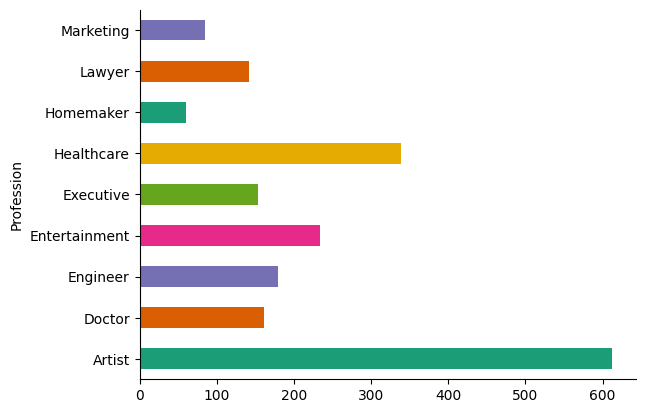

In [10]:
dataset.groupby('Profession').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

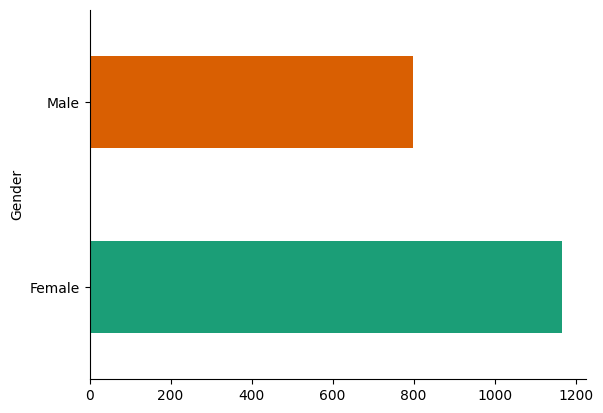

In [11]:
dataset.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

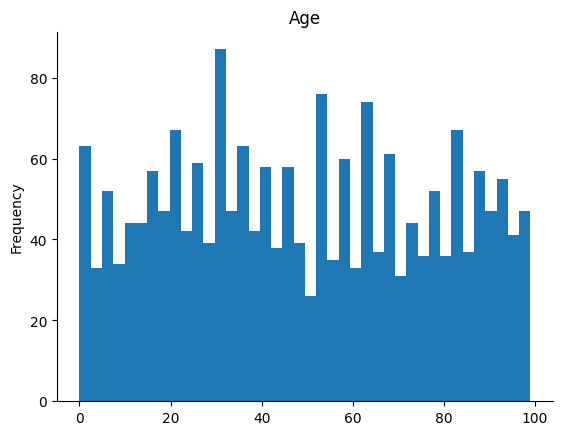

In [12]:
dataset['Age'].plot(kind='hist', bins=40, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Veri ön işleme
- Label Encoding
- Min Max scaler

In [13]:
label_encoder1 = LabelEncoder()
label_encoder2 = LabelEncoder()

dataset['Gender'] = label_encoder1.fit_transform(dataset['Gender'])
dataset['Profession'] = label_encoder2.fit_transform(dataset['Profession'])

In [14]:
dict(zip(label_encoder1.classes_, label_encoder1.transform(label_encoder1.classes_)))

{'Female': 0, 'Male': 1}

In [15]:
dict(zip(label_encoder2.classes_, label_encoder2.transform(label_encoder2.classes_)))

{'Artist': 0,
 'Doctor': 1,
 'Engineer': 2,
 'Entertainment': 3,
 'Executive': 4,
 'Healthcare': 5,
 'Homemaker': 6,
 'Lawyer': 7,
 'Marketing': 8}

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1965 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              1965 non-null   int64
 1   Gender                  1965 non-null   int64
 2   Age                     1965 non-null   int64
 3   Annual Income ($)       1965 non-null   int64
 4   Spending Score (1-100)  1965 non-null   int64
 5   Profession              1965 non-null   int64
 6   Work Experience         1965 non-null   int64
 7   Family Size             1965 non-null   int64
dtypes: int64(8)
memory usage: 138.2 KB


In [17]:
dataset.drop(['CustomerID'], axis=1, inplace=True)

In [18]:
x = dataset.drop

In [19]:
scaler = MinMaxScaler()
dataset_scaled = scaler.fit_transform(dataset)

# İdeal grup sayısını gözlemlemek

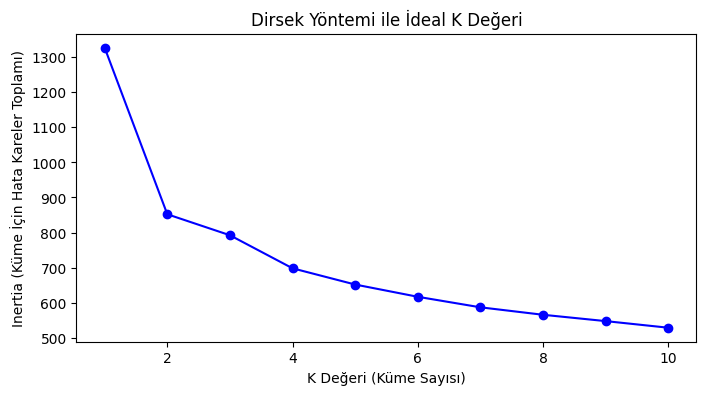

In [20]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dataset_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('K Değeri (Küme Sayısı)')
plt.ylabel('Inertia (Küme İçin Hata Kareler Toplamı)')
plt.title('Dirsek Yöntemi ile İdeal K Değeri')
plt.show()


# Model eğitimi , Dataset güncellenmesi

In [21]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(dataset_scaled)

grupID = kmeans.predict(dataset_scaled)
dataset['grupID'] = grupID


In [22]:
grupID_ort = dataset.groupby('grupID').mean()
print(grupID_ort)

        Gender        Age  Annual Income ($)  Spending Score (1-100)  \
grupID                                                                 
0          0.0  48.906518      110434.875643               50.993139   
1          1.0  46.092437      109073.700280               47.658263   
2          1.0  51.126697      112339.554299               54.067873   

        Profession  Work Experience  Family Size  
grupID                                            
0         2.814751         4.036021     3.760720  
1         5.235294         4.193277     4.092437  
2         0.929864         4.160633     3.477376  


In [25]:
dataset.head()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,grupID
0,1,19,15000,39,5,1,4,1
1,1,21,35000,81,2,3,3,2
2,0,20,86000,6,2,1,1,0
3,0,23,59000,77,7,0,2,0
4,0,31,38000,40,3,2,6,0
